In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))

In [ ]:
dfdaus = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()


job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

dfx = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()


dfdaus = dfdaus.dropna(subset= 'salary_year_avg')

dfdaus = dfdaus.explode('job_skills')


dfg = dfdaus.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

toppay = dfg.sort_values('median', ascending = False).head(10)

topcount = dfg.sort_values('count', ascending = False).head(10).sort_values('median', ascending = False).head(10)

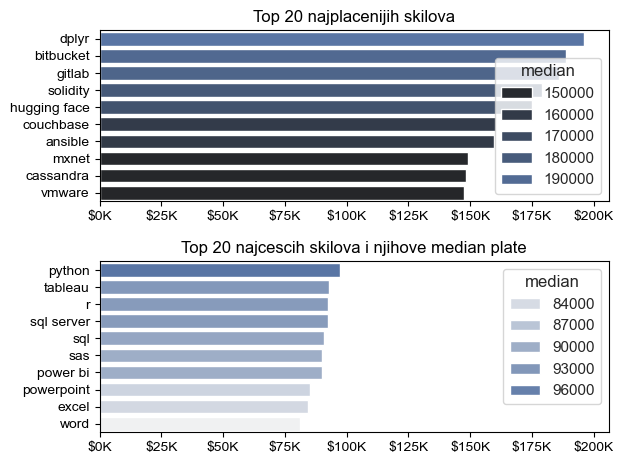

In [17]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

# toppay.plot(kind='barh', y='median', legend = False, ax=ax[0])
sns.barplot(data=toppay, x='median', y=toppay.index, ax = ax[0], hue='median', palette = 'dark:b')

ax[0].set_title('Top 20 najplacenijih skilova')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

# topcount.plot(kind='barh', y='median', legend = False, ax=ax[1])
sns.barplot(data=topcount, x='median', y=topcount.index, ax = ax[1], hue='median', palette = 'light:b')

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 20 najcescih skilova i njihove median plate')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))



# for axes in ax:
#     axes.invert_yaxis()
fig.tight_layout()





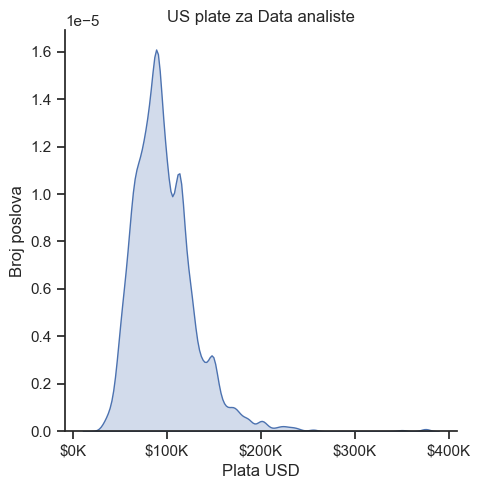

In [22]:
sns.displot(dfdaus['salary_year_avg'], kind='kde', fill=True)

# low, high = dfdaus['salary_year_avg'].quantile([0.0005, 0.998])
# plt.xlim(low, high)

plt.title('US plate za Data analiste')
plt.ylabel('Broj poslova')
plt.xlabel('Plata USD')

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

plt.show()

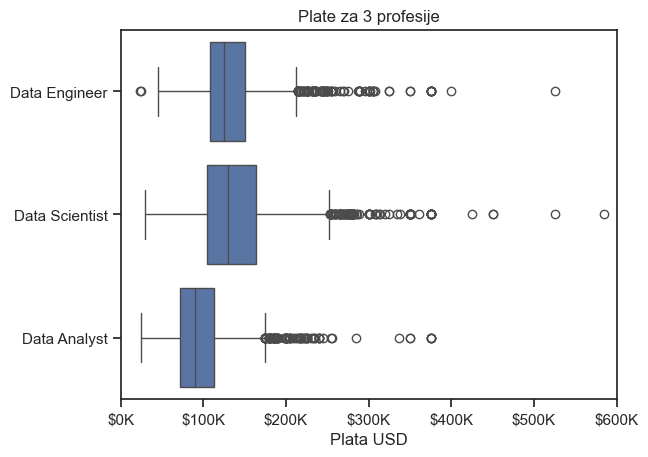

In [28]:
sns.boxplot(data=dfx, x='salary_year_avg', y = 'job_title_short')

plt.title('Plate za 3 profesije')
plt.xlabel('Plata USD')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))
plt.xlim(0, 600000)

plt.show()